In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
data=pd.read_excel("/Users/zhejindong/Downloads/AmesHousing.xls")
Target=data["SalePrice"]
#data=data.drop(columns=["SalePrice"])

# 1.1 
Visualize the univariate distribution of each continuous, and the distribution of the target. Do you notice anything? Is there something that might require special treatment?


In [3]:
data.isna().sum()

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [4]:
data=data.drop(columns=["Order","PID"])

In [6]:
# DATA Preprocessing:
df1=data.loc[:,data.dtypes== object]
cat=list(df1)
Categorical=data.loc[:,cat]
Continuous=list(set(list(data))-set(cat)-set(["SalePrice"]))


## Continuous Feature distribution 

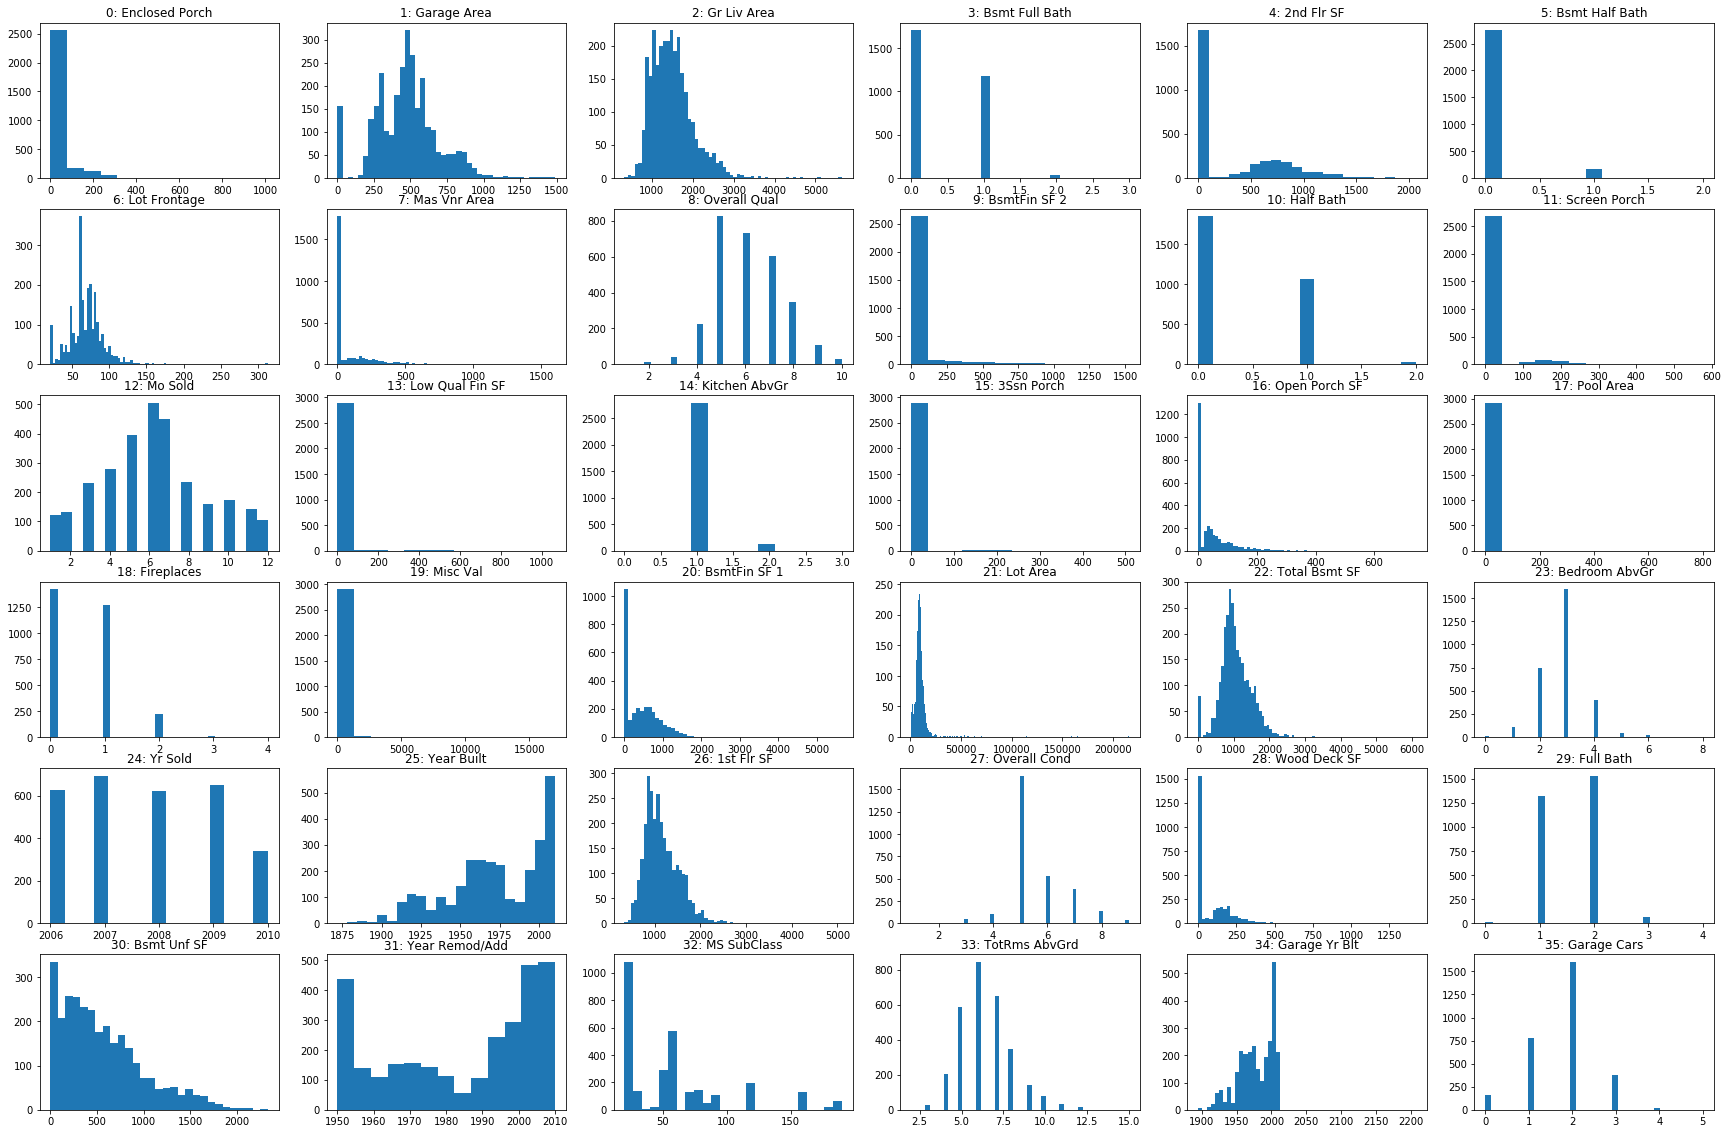

In [7]:
fig, axes = plt.subplots(6,6, figsize=(30, 20))
for i, ax in enumerate(axes.ravel()):
    if i >= 37:
        ax.set_visible(False)
        break
    ax.hist(data[Continuous[i]].dropna(), bins="auto")
    ax.set_title("{}: {}".format(i, list(Continuous)[i]))
#plt.savefig("images/boston_hist.png")

Text(0, 0.5, 'MEDV')

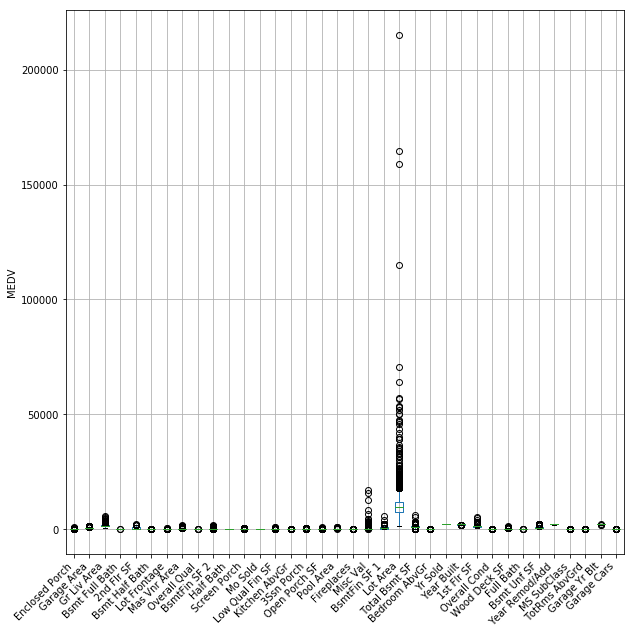

In [8]:
#plt.boxplot(Con.iloc[:,:3])
plt.subplots(1, figsize=(10, 10))
data[Continuous].boxplot()
plt.xticks(np.arange(1, data[Continuous].shape[1] + 1), Continuous, rotation=45, ha="right")
plt.ylabel("MEDV")

## Target distribution 


(array([ 146., 1333.,  908.,  329.,  134.,   51.,   14.,    9.,    4.,
           2.]),
 array([ 12789. ,  87010.1, 161231.2, 235452.3, 309673.4, 383894.5,
        458115.6, 532336.7, 606557.8, 680778.9, 755000. ]),
 <a list of 10 Patch objects>)

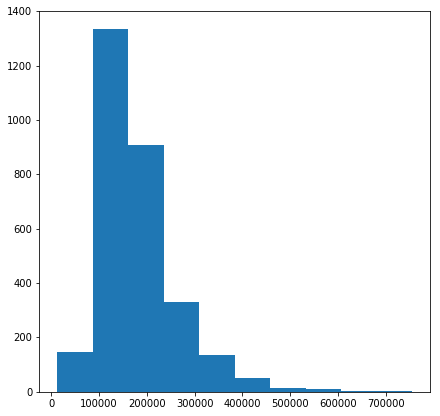

In [61]:
plt.figure(figsize=(7,7))
plt.hist(Target.values,bins=10)

### Answer:

Through observation, I found:

1 For some continuous features in fact are discrete. In that case, we may need to treat them like categorical variables. 

2 There are two main patterns in continuous features. (1) Gaussian Distribution  (2) Sparse

# 1.2 
Visualize the dependency of the target on each continuous feature (2d scatter plot).

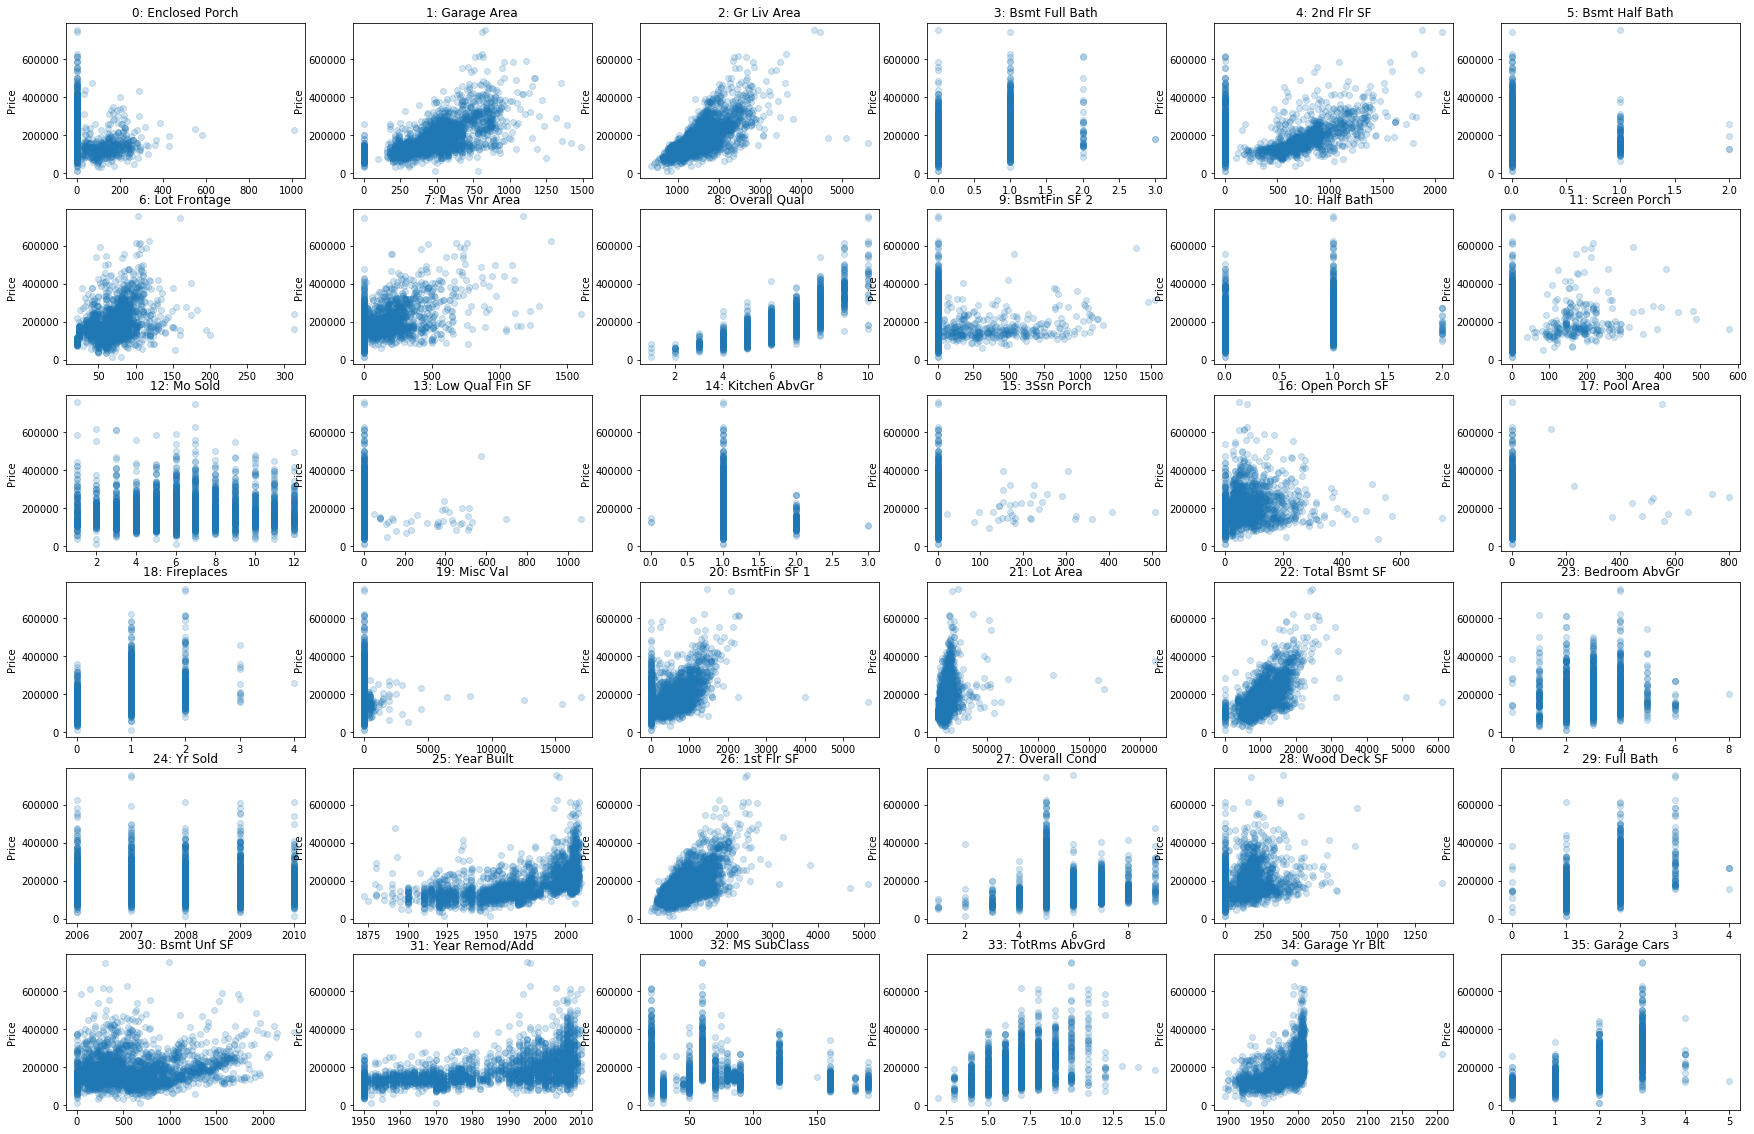

In [9]:

fig, axes = plt.subplots(6, 6, figsize=(30, 20))
for i, ax in enumerate(axes.ravel()):
    if i >= 37:
        ax.set_visible(False)
        break
    ax.plot(data[Continuous[i]],Target, 'o', alpha=.2)
    ax.set_title("{}: {}".format(i, Continuous[i]))
    ax.set_ylabel("Price")
#plt.savefig("images/boston_scatter.png")


# 1.3 
Split data in training and test set. Do not use the test-set unless for a final evaluation in 1.6. For each categorical variable, cross-validate a Linear Regression model using just this variable (one-hot-encoded). Visualize the relationship of the categorical variables that provide the best R^2 value with the target.

In [66]:
# Split the data 
from sklearn.model_selection import train_test_split
data_copy=data.drop(columns=["SalePrice"])
X_train, X_test, y_train, y_test = train_test_split(data_copy, Target, random_state=0)
df1=data_copy.loc[:,X_train.dtypes== object]
cat=list(df1)

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
# replace NA with new label:
X_TR_C=X_train[cat].fillna("NO_VALUE")

performance=[]
for CAT in cat:
    Cat_one_hot=OneHotEncoder(categorical_features="all").fit_transform(X_TR_C[CAT].values.reshape(-1, 1))
    performance.append(np.mean(cross_val_score(LinearRegression(), Cat_one_hot, y_train, cv=10)))

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categor

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categor

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categor

<Figure size 1440x1080 with 0 Axes>

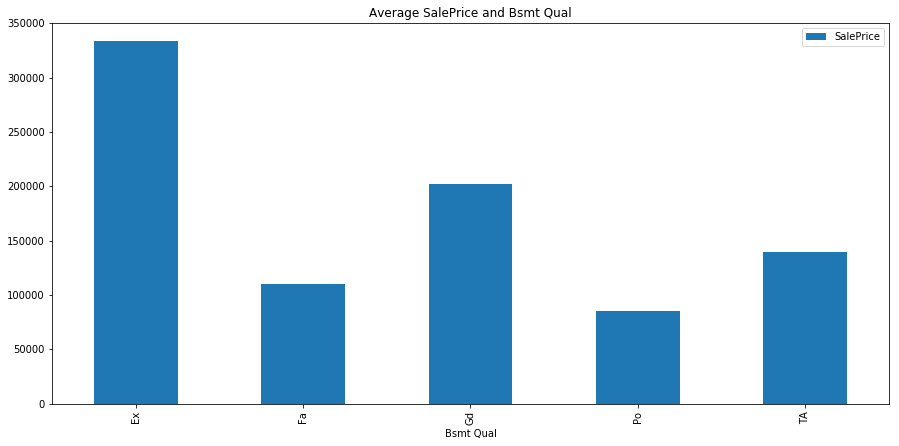

<Figure size 1440x1080 with 0 Axes>

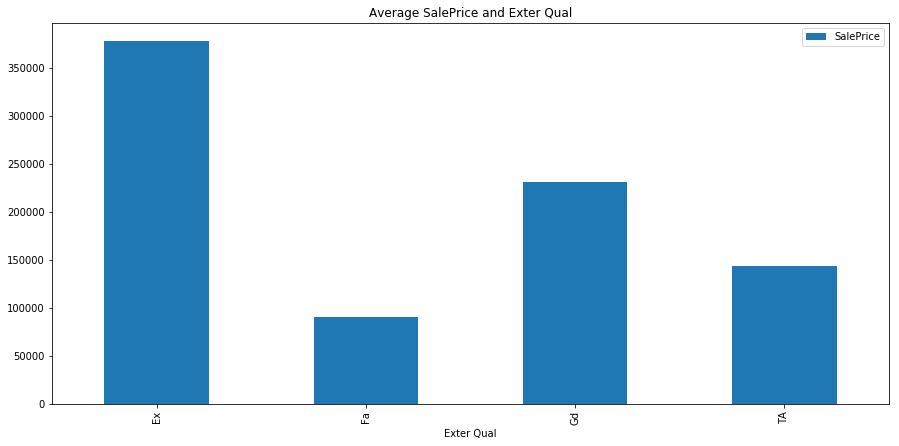

<Figure size 1440x1080 with 0 Axes>

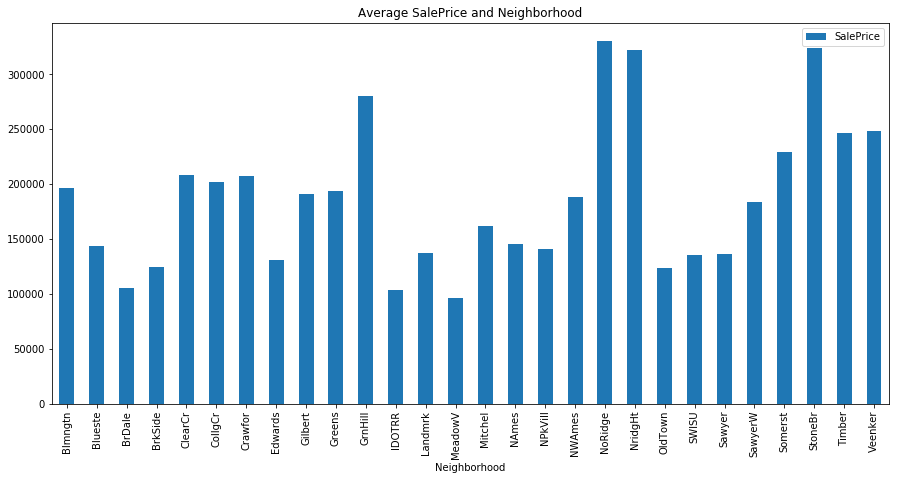

In [68]:
best_cat_index=np.argsort(np.array(performance))[-3:]

for i in range(len(best_cat_index)):
    plt.figure(figsize=(20, 15))
    best_cat=cat[best_cat_index[i]]
    data[[best_cat,"SalePrice"]].groupby([best_cat],as_index=False).mean().plot.bar(x=best_cat, y="SalePrice",figsize=(15, 7),title="Average SalePrice and "+best_cat)
    

# 1.4 

Use ColumnTransformer and pipeline to encode categorical variables. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. Does scaling the data (within the pipeline) with StandardScaler help?


In [171]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
cat=X_train.dtypes == object

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
numeric_transformer_std = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())])

categorical_features = X_train.dtypes == object
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,~categorical_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessor_std = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_std,~categorical_features),
        ('cat', categorical_transformer, categorical_features)])


# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
print("-------With out standardization--------")

clf_LR = Pipeline(steps=[('preprocessor', preprocessor),
                      ('LinearRegression',LinearRegression())])
print("LinearRegression: %.3f " %np.mean(cross_val_score(clf_LR, X_train, y_train,scoring='r2')))


clf_R = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Ridge',Ridge())])
print("Ridge: %.3f " %np.mean(cross_val_score(clf_R,X_train, y_train,scoring='r2')))


clf_L = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Lasso',Lasso())])
print("Lasso: %.3f " %np.mean(cross_val_score(clf_L,X_train, y_train,scoring='r2')))

clf_E= Pipeline(steps=[('preprocessor', preprocessor),
                      ('ElasticNet',ElasticNet())])
print("ElasticNet: %.3f " %np.mean(cross_val_score(clf_E,X_train, y_train,scoring='r2')))




print("-------With standardization--------")

clf_LR_std = Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('LinearRegression',LinearRegression())])
print("LinearRegression: %.3f " %np.mean(cross_val_score(clf_LR_std,X_train, y_train,scoring='r2')))


clf_R = Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('Ridge',Ridge())])
print("Ridge: %.3f " %np.mean(cross_val_score(clf_R,X_train, y_train,scoring='r2')))


clf_L = Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('Lasso',Lasso())])
print("Lasso: %.3f " %np.mean(cross_val_score(clf_L,X_train, y_train,scoring='r2')))

clf_E= Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('ElasticNet',ElasticNet())])
print("ElasticNet: %.3f " %np.mean(cross_val_score(clf_E,X_train, y_train,scoring='r2')))





-------With out standardization--------
LinearRegression: -28024214.617 
Ridge: 0.863 


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso: 0.868 


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet: 0.842 
-------With standardization--------
LinearRegression: -36331606603451138048.000 
Ridge: 0.863 


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso: 0.868 
ElasticNet: 0.851 


### Answer:

Throught the comparisions, I found:
    
1 Linear Regression Model is seriously biased. This is because after using one hot encoding, we added too many correlated features to dataset. If the features are
highly correlated, linear regression will have a poor prediction

2 Using standardization does not help Lasso and Ridge, but it can improve ElasticNet performance.

# 1.5 

Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.


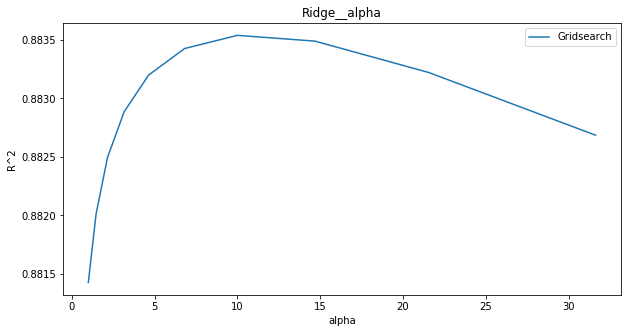

In [84]:
from sklearn.model_selection import GridSearchCV
parameters = {}
param_grid = {'Ridge__alpha': np.logspace(0, 1.5, 10)}
CV_R = GridSearchCV(clf_R, param_grid, scoring = 'r2',cv=10)
CV_R.fit(X_train, y_train)   
L=len(CV_R.cv_results_["param_Ridge__alpha"])
plt.figure(figsize=(10,5))
plt.plot(CV_R.cv_results_["param_Ridge__alpha"].data, CV_R.cv_results_ ["mean_test_score"],label="Gridsearch")
#plt.plot(CV_R.cv_results_["param_Ridge__alpha"].data,[0.863]*L,"red",label="base")
plt.title("Ridge__alpha")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.legend()
#CV_R_Best=CV_R.best_estimator_

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


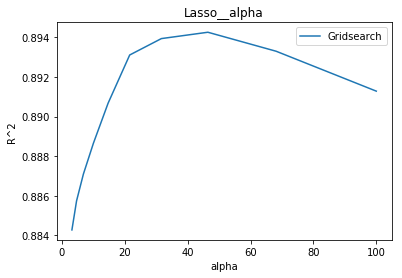

In [92]:
parameters = {}
param_grid = {'Lasso__alpha': np.logspace(0.5, 2, 10)}
CV_L = GridSearchCV(clf_L, param_grid, scoring = 'r2',cv=10)
CV_L.fit(X_train, y_train)  
L=len(CV_L.cv_results_["param_Lasso__alpha"])
plt.plot(CV_L.cv_results_["param_Lasso__alpha"].data, CV_L.cv_results_ ["mean_test_score"],label="Gridsearch")
#plt.plot(CV_L.cv_results_["param_Lasso__alpha"].data,[0.868]*L,"red",label="base")
plt.title("Lasso__alpha")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.legend()

In [105]:
parameters = {}
param_grid = {'ElasticNet__alpha': np.logspace(1, 2, 10).round(2),'ElasticNet__l1_ratio': np.logspace(-1, 0, 5).round(2)}
CV_E = GridSearchCV(clf_E, param_grid, scoring = 'r2',cv=10)
CV_E.fit(X_train, y_train)   

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...alse, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'ElasticNet__alpha': array([ 10.  ,  12.92,  16.68,  21.54,  27.83,  35.94,  46.42,  59.95,
        77.43, 100.  ]), 'ElasticNet__l1_ratio': array([0.1 , 0.18, 0.32, 0.56, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [106]:
import pandas as pd
res = pd.pivot_table(pd.DataFrame(CV_E.cv_results_),
    values='mean_test_score', index='param_ElasticNet__alpha', columns='param_ElasticNet__l1_ratio')


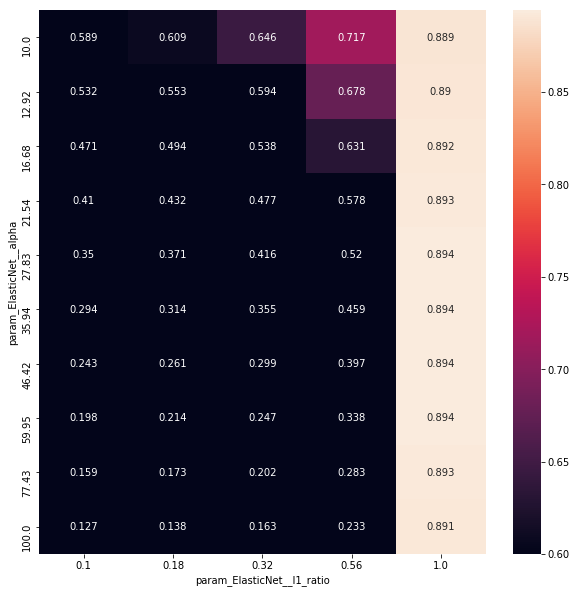

In [107]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

### Answer:

Using GridSearchCV can help find the optimal parameters to improve the performance of model. For Ridge, best alpha is arond 10;
for Lasso, best alpha is around 45; for ElasticNet, best parameter combination is l1_ratio==1, alpha==60

# 1.6
Visualize the coefficients of the resulting models. Do they agree on which features are important?

Text(0.5, 1.0, 'ElasticNet coefficients')

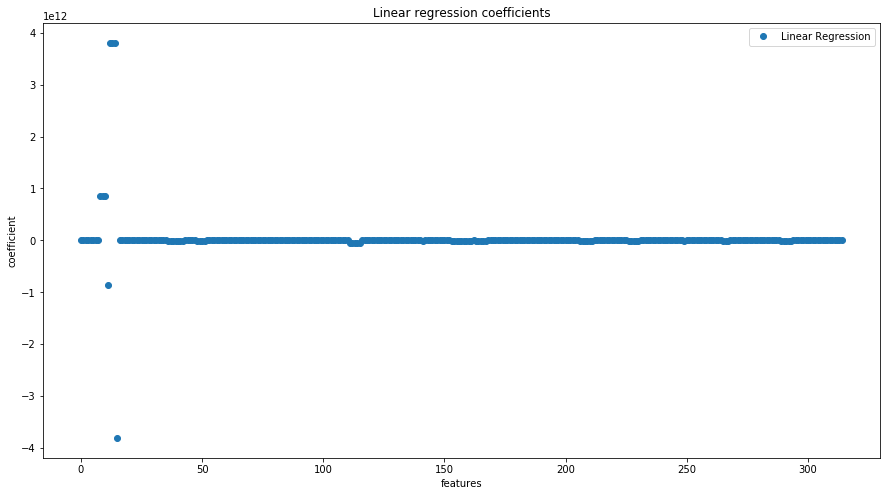

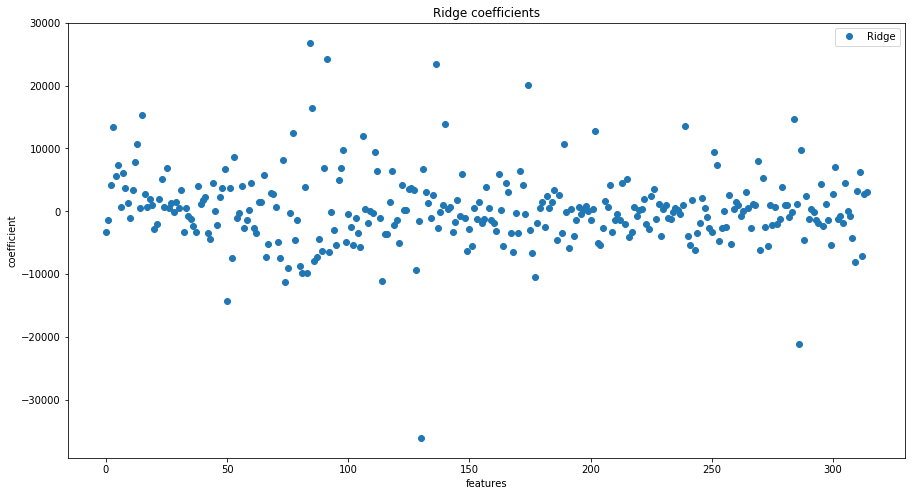

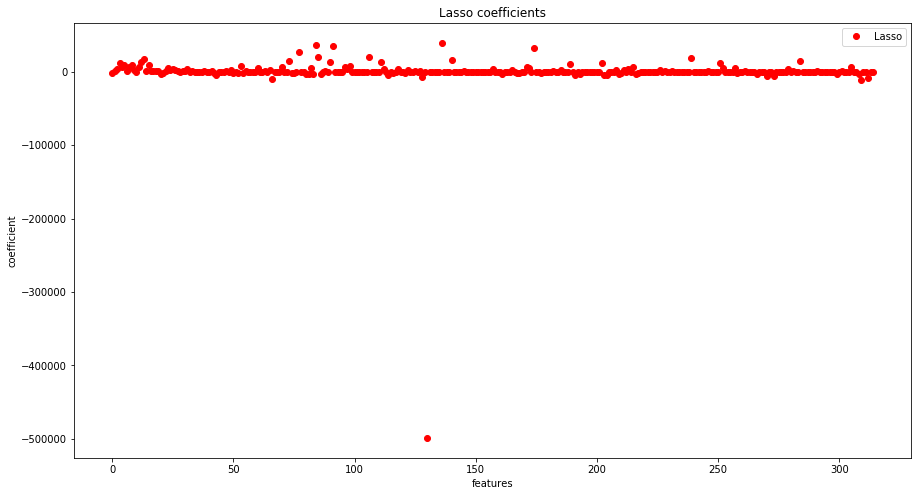

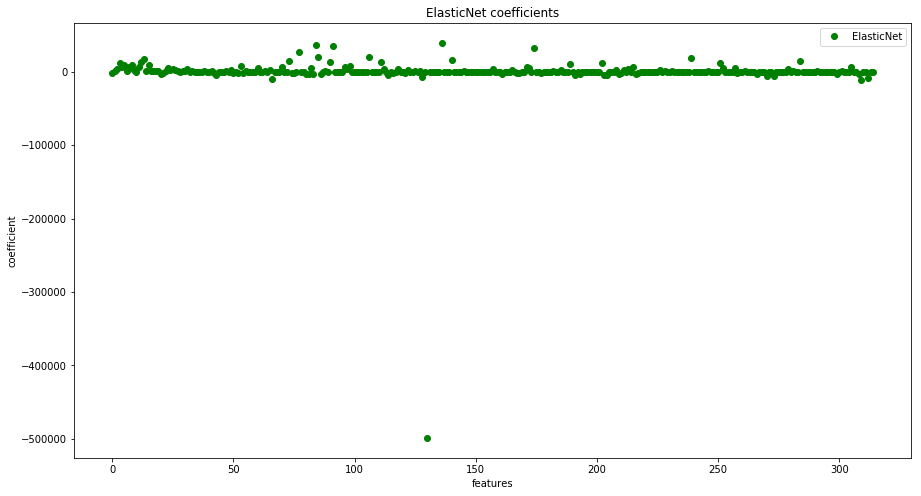

In [181]:


plt.figure(figsize=(15,8))
plt.plot(clf_LR.fit(X_train,y_train).get_params()['LinearRegression'].coef_, 'o', label="Linear Regression")
plt.legend()
plt.ylabel("coefficient")
plt.xlabel("features")
plt.title("Linear regression coefficients")

plt.figure(figsize=(15,8))
plt.plot((CV_R.best_estimator_).steps[1][1].coef_, 'o', label="Ridge")
plt.legend()
plt.ylabel("coefficient")
plt.xlabel("features")
plt.title("Ridge coefficients")

plt.figure(figsize=(15,8))
plt.plot((CV_L.best_estimator_).steps[1][1].coef_, 'ro', label="Lasso")
plt.legend()
plt.ylabel("coefficient")
plt.xlabel("features")
plt.title("Lasso coefficients")

plt.figure(figsize=(15,8))
plt.plot((CV_E.best_estimator_).steps[1][1].coef_, 'go', label="ElasticNet")
plt.legend()
plt.ylabel("coefficient")
plt.xlabel("features")
plt.title("ElasticNet coefficients")


In [130]:
print("largest coefficient index: "+ str((CV_E.best_estimator_).steps[1][1].coef_.argmax()))

largest coefficient index:136


In [156]:
feature_name=CV_E.best_estimator_.steps[0][1].get_params()['transformers'][1][2]

In [ ]:
list((feature_name).keys())[len(list(data))-sum(list(cat))]

## Answer:

We select the feature name having highest coefficient, which is 'Total Bsmt SF'. That is different with our expectation.

We can conclude coefficients are not reliable indicators of feature importance especially when the features are highly related.

